In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns
from scipy.stats import mode

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")


print("Path to dataset files:", path)

Path to dataset files: /Users/sztosik/.cache/kagglehub/datasets/rabieelkharoua/alzheimers-disease-dataset/versions/1


In [4]:
files = os.listdir(path)
print("Content of", files)

csv_file = files[0]
csv_path = os.path.join(path, csv_file)

# Display the content of dataset
data = pd.read_csv(csv_path)

data.head(5)

Content of ['alzheimers_disease_data.csv']


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [5]:
# Divide the dataset into manually 
# selected classes based on feature groups
classes_dict = {
    "Demografic_Details": 
    ["Age", "Gender", "Ethnicity", "EducationLevel"],# 6
    "Lifestyle_Factors": [
        "BMI",
        "Smoking",
        "AlcoholConsumption",
        "PhysicalActivity",
        "DietQuality",
        "SleepQuality",
    ], # 15
    "Medical_History": [
        "FamilyHistoryAlzheimers",
        "CardiovascularDisease",
        "Diabetes",
        "Depression",
        "HeadInjury",
        "Hypertension",
    ], # 15
    "Clinical_Measurements": [
        "SystolicBP",
        "DiastolicBP",
        "CholesterolTotal",
        "CholesterolLDL",
        "CholesterolHDL",
        "CholesterolTriglycerides",
    ],
    "Congnitive_and_Functional_Assements": [
        "MMSE",
        "FunctionalAssessment",
        "MemoryComplaints",
        "BehavioralProblems",
        "ADL",
    ],
    "Symptoms": [
        "Confusion",
        "Disorientation",
        "PersonalityChanges",
        "DifficultyCompletingTasks",
        "Forgetfulness",
    ],
}

diagnosis = data["Diagnosis"]

class_data = {cls_name: data[params] for cls_name, params in classes_dict.items()}
print("Classes of parameters:\n")
for cls_name, _ in class_data.items():
    print(cls_name)

Classes of parameters:

Demografic_Details
Lifestyle_Factors
Medical_History
Clinical_Measurements
Congnitive_and_Functional_Assements
Symptoms


Feature scales and distributions:

Statistics for Age:
Mean: 74.91
Median: 75.00
Standard Deviation: 8.99
Min: 60.00, Max: 90.00
Range: 30.00
Skewness: 0.05


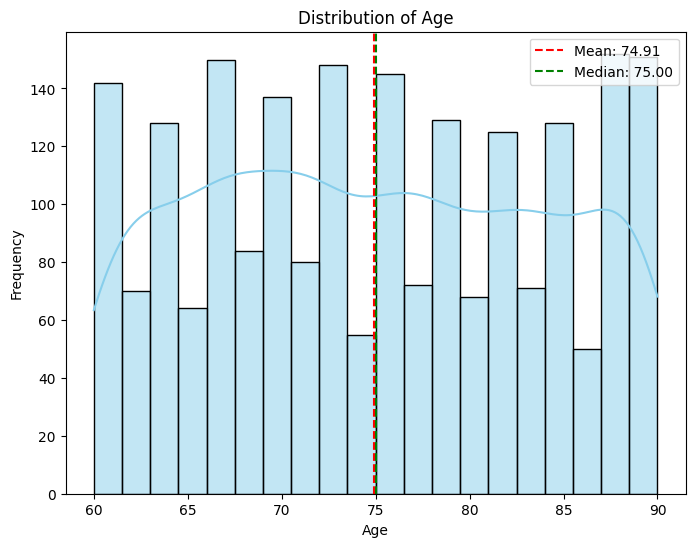


Statistics for Gender:
Mean: 0.51
Median: 1.00
Standard Deviation: 0.50
Min: 0.00, Max: 1.00
Range: 1.00
Skewness: -0.03


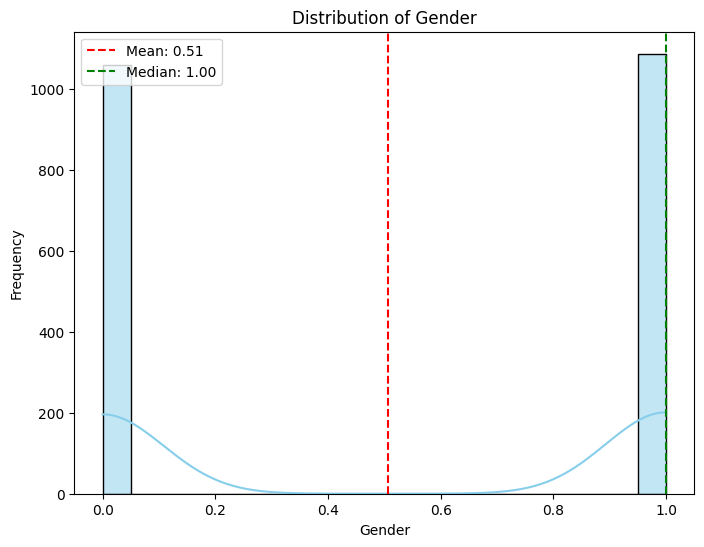


Statistics for Ethnicity:
Mean: 0.70
Median: 0.00
Standard Deviation: 1.00
Min: 0.00, Max: 3.00
Range: 3.00
Skewness: 1.23


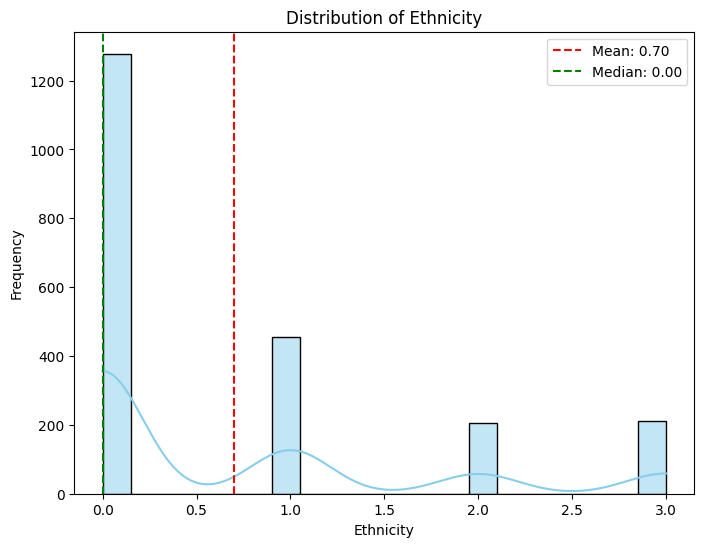


Statistics for EducationLevel:
Mean: 1.29
Median: 1.00
Standard Deviation: 0.90
Min: 0.00, Max: 3.00
Range: 3.00
Skewness: 0.21


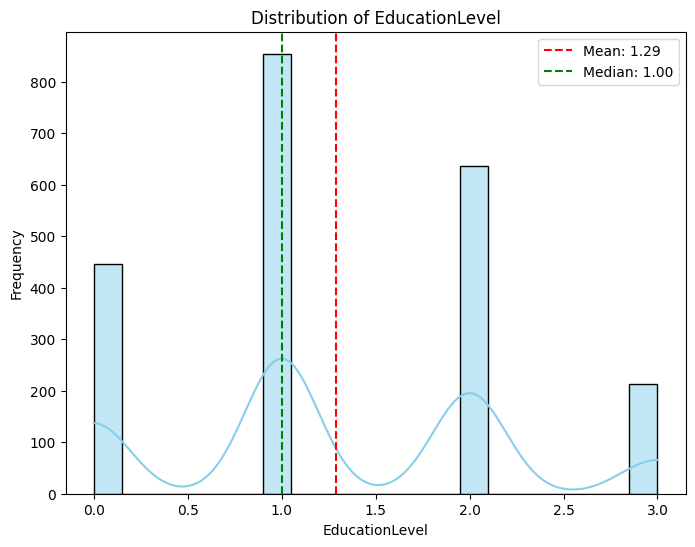

No significant outliers in Age.
No significant outliers in Gender.
No significant outliers in Ethnicity.
No significant outliers in EducationLevel.


In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, mode, zscore

# Extract data from the "Demografic_Details" class
demographic_data = class_data["Demografic_Details"]

# Function to describe the scales and distribution of the features
def describe_feature_scales_and_distribution(data):
    print("Feature scales and distributions:")
    
    # Loop through the columns
    for col in data.columns:
        # Only process integer columns
        if data[col].dtype == 'int64':  # Only integer values
            print(f"\nStatistics for {col}:")
            # For continuous variables (only integers now)
            mean = data[col].mean()
            median = data[col].median()
            #modal = mode(data[col].dropna())[0][0]  # Most frequent value (mode)
            std = data[col].std()
            min_val = data[col].min()
            max_val = data[col].max()
            range_val = max_val - min_val
            skewness = skew(data[col].dropna())  # Skewness check
            
            print(f"Mean: {mean:.2f}")
            print(f"Median: {median:.2f}")
            #print(f"Mode: {modal}")
            print(f"Standard Deviation: {std:.2f}")
            print(f"Min: {min_val:.2f}, Max: {max_val:.2f}")
            print(f"Range: {range_val:.2f}")
            print(f"Skewness: {skewness:.2f}")
            
            # Check if the feature needs normalization or standardization
            if std > 1.5 * mean:  # Example condition for needing standardization
                print(f"Warning: {col} has a large standard deviation, consider standardizing.")
            
            # Visualize the distribution with mean, median, and mode lines
            plt.figure(figsize=(8, 6))
            sns.histplot(data[col], kde=True, color="skyblue", bins=20)
            plt.axvline(mean, color="red", linestyle="--", label=f"Mean: {mean:.2f}")
            plt.axvline(median, color="green", linestyle="--", label=f"Median: {median:.2f}")
            #plt.axvline(modal, color="orange", linestyle="--", label=f"Mode: {modal}")
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.legend()
            plt.show()
        
        else:  # For categorical variables
            value_counts = data[col].value_counts()
            print(f"Value counts for {col}:")
            print(value_counts)
            sns.countplot(data=data, x=col, palette="pastel")
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.show()

# Check the features in "Demografic_Details" (excluding non-integer features)
describe_feature_scales_and_distribution(demographic_data)

# Z-score normalization check (for outliers and identifying features that need normalization)
def check_outliers_and_normalization(data):
    for col in data.columns:
        if data[col].dtype == 'int64':  # Only for integer columns
            z_scores = zscore(data[col].dropna())
            outliers = np.where(np.abs(z_scores) > 3)  # Check for outliers (z > 3)
            if len(outliers[0]) > 0:
                print(f"Outliers detected in {col}. Number of outliers: {len(outliers[0])}")
            else:
                print(f"No significant outliers in {col}.")
                
            # If the data is skewed, it might need normalization
            skewness = skew(data[col].dropna())
            if np.abs(skewness) > 1:
                print(f"Warning: {col} is highly skewed (skewness = {skewness:.2f}), consider normalization.")

# Check for outliers and skewness in "Demografic_Details"
check_outliers_and_normalization(demographic_data)


Feature scales and distributions for Medical History:

Statistics for FamilyHistoryAlzheimers:
Mean: 0.25
Median: 0.00
Standard Deviation: 0.43
Min: 0.00, Max: 1.00
Range: 1.00
Skewness: 1.14


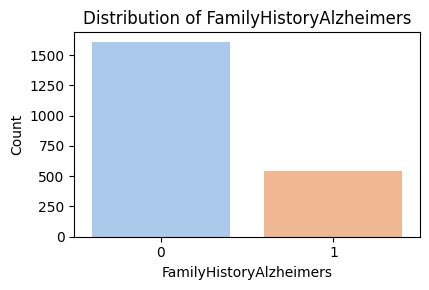


Statistics for CardiovascularDisease:
Mean: 0.14
Median: 0.00
Standard Deviation: 0.35
Min: 0.00, Max: 1.00
Range: 1.00
Skewness: 2.03


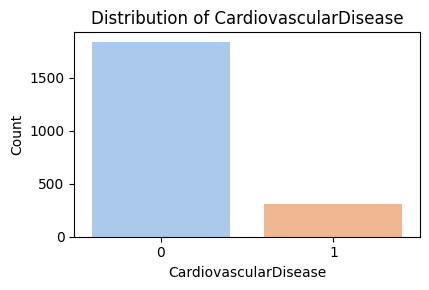


Statistics for Diabetes:
Mean: 0.15
Median: 0.00
Standard Deviation: 0.36
Min: 0.00, Max: 1.00
Range: 1.00
Skewness: 1.95


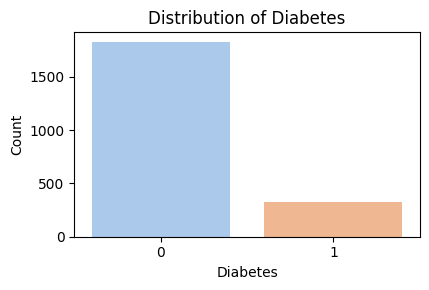


Statistics for Depression:
Mean: 0.20
Median: 0.00
Standard Deviation: 0.40
Min: 0.00, Max: 1.00
Range: 1.00
Skewness: 1.50


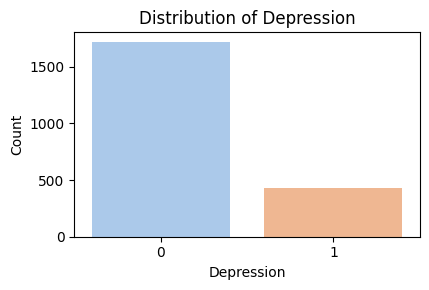


Statistics for HeadInjury:
Mean: 0.09
Median: 0.00
Standard Deviation: 0.29
Min: 0.00, Max: 1.00
Range: 1.00
Skewness: 2.81


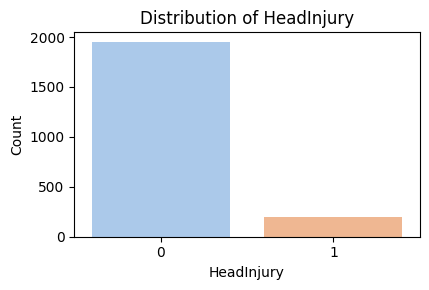

No significant outliers in FamilyHistoryAlzheimers.
No significant outliers in CardiovascularDisease.
No significant outliers in Diabetes.
No significant outliers in Depression.
Outliers detected in HeadInjury. Number of outliers: 199


In [102]:
# Extract data from the "Medical_History" class
medical_history_data = class_data["Medical_History"]

# Function to describe the scales and distribution of the features
def describe_feature_scales_and_distribution(data):
    print("Feature scales and distributions for Medical History:")
    
    # Loop through the columns
    for col in data.columns:
        # Only process integer columns or categorical columns (like FamilyHistoryAlzheimers)
        if data[col].dtype == 'int64':  # Only integer columns (binary 0/1 data)
            print(f"\nStatistics for {col}:")
            # For continuous variables (only integers now)
            mean = data[col].mean()
            median = data[col].median()
            std = data[col].std()
            min_val = data[col].min()
            max_val = data[col].max()
            range_val = max_val - min_val
            skewness = skew(data[col].dropna())  # Skewness check
            
            # Print the statistics for the feature
            print(f"Mean: {mean:.2f}")
            print(f"Median: {median:.2f}")
            print(f"Standard Deviation: {std:.2f}")
            print(f"Min: {min_val:.2f}, Max: {max_val:.2f}")
            print(f"Range: {range_val:.2f}")
            print(f"Skewness: {skewness:.2f}")
            
            # Create the subplot for the feature
            plt.figure(figsize=(8, 3))
            
            # Create the first subplot for the current column
            plt.subplot(1, 2, 1)
            sns.countplot(data=data, x=col, hue=col, palette="pastel", legend=False)
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Count")
            
              
            plt.tight_layout()
            plt.show()

# Check the features in "Medical_History"
describe_feature_scales_and_distribution(medical_history_data)

# Z-score normalization check (for outliers and identifying features that need normalization)
def check_outliers_and_normalization(data):
    for col in data.columns:
        if data[col].dtype == 'int64':  # Only for integer columns
            z_scores = zscore(data[col].dropna())
            outliers = np.where(np.abs(z_scores) > 3)  # Check for outliers (z > 3)
            if len(outliers[0]) > 0:
                print(f"Outliers detected in {col}. Number of outliers: {len(outliers[0])}")
            else:
                print(f"No significant outliers in {col}.")
                
            # If the data is skewed, it might need normalization
            skewness = skew(data[col].dropna())
            if np.abs(skewness) > 1:
                print(f"Warning: {col} is highly skewed (skewness = {skewness:.2f}), consider normalization.")

                # Perform standardization if needed
                if col == "Hypertension":  # Example for standardizing Hypertension due to skewness
                    scaler = StandardScaler()
                    data[col] = scaler.fit_transform(data[[col]])
                    print(f"{col} has been standardized.")

# Check for outliers and skewness in "Medical_History"
check_outliers_and_normalization(medical_history_data)


Feature scales and distributions:

Statistics for BMI:
Mean: 27.66
Median: 28.00
Standard Deviation: 7.22
Min: 15.00, Max: 40.00
Range: 25.00
Skewness: -0.03


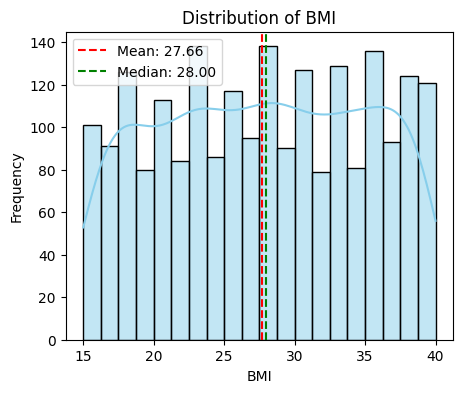


Statistics for Smoking:
Mean: 0.29
Median: 0.00
Standard Deviation: 0.45
Min: 0.00, Max: 1.00
Range: 1.00
Skewness: 0.93


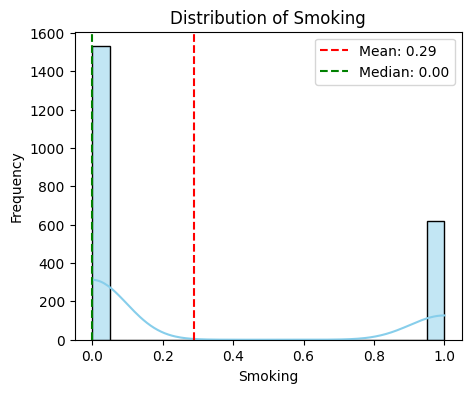


Statistics for AlcoholConsumption:
Mean: 10.05
Median: 10.00
Standard Deviation: 5.76
Min: 0.00, Max: 20.00
Range: 20.00
Skewness: 0.02


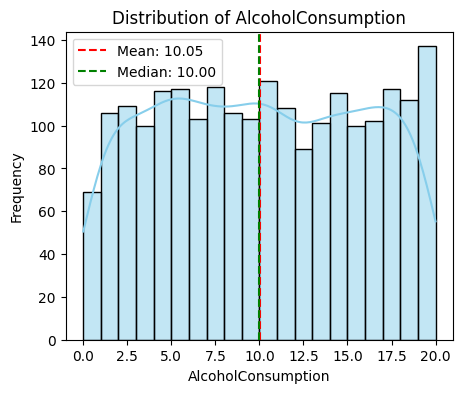


Statistics for PhysicalActivity:
Mean: 4.92
Median: 4.77
Standard Deviation: 2.86
Min: 0.00, Max: 9.99
Range: 9.98
Skewness: 0.04


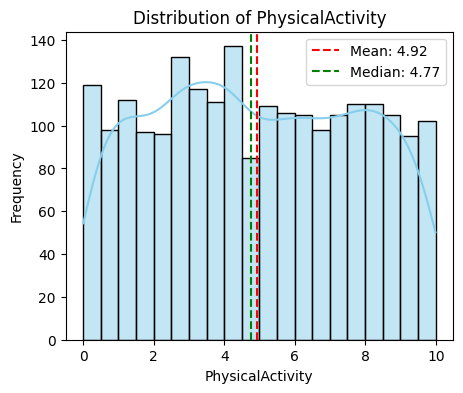


Statistics for DietQuality:
Mean: 4.99
Median: 5.08
Standard Deviation: 2.91
Min: 0.01, Max: 10.00
Range: 9.99
Skewness: -0.01


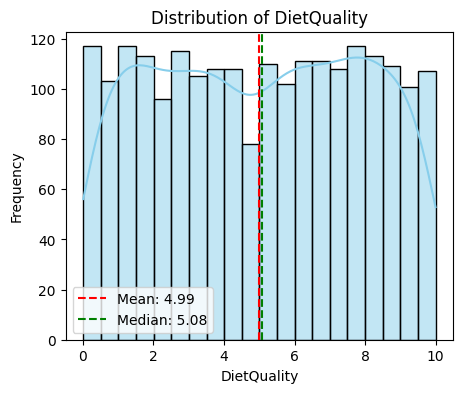


Statistics for SleepQuality:
Mean: 7.05
Median: 7.12
Standard Deviation: 1.76
Min: 4.00, Max: 10.00
Range: 6.00
Skewness: -0.07


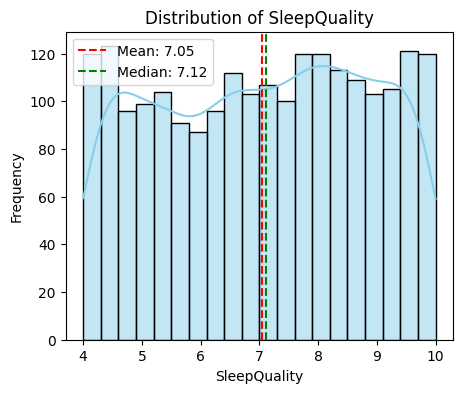

No significant outliers in BMI.
No significant outliers in Smoking.
No significant outliers in AlcoholConsumption.
No significant outliers in PhysicalActivity.
No significant outliers in DietQuality.
No significant outliers in SleepQuality.


In [ ]:
lifestyle_data = class_data["Lifestyle_Factors"]

# Function to round values to the nearest 0.5
def round_to_nearest_half(x):
    return round(x * 2) / 2

# Function to describe the scales and distribution of features
def describe_feature_scales_and_distribution(data):
    print("Feature scales and distributions:")
    
    # Loop through the columns
    for col in data.columns:
        # Only for numerical columns
        if data[col].dtype in ['float64', 'int64']:  
            print(f"\nStatistics for {col}:")
            
            # If the feature needs rounding (e.g., BMI, AlcoholConsumption)
            if col in ["BMI", "AlcoholConsumption"]:
                data.loc[:, col] = data[col].apply(round_to_nearest_half)  # Use loc to modify

            # Basic statistics
            mean = data[col].mean()
            median = data[col].median()
            std = data[col].std()
            min_val = data[col].min()
            max_val = data[col].max()
            range_val = max_val - min_val
            skewness = skew(data[col].dropna())  # Skewness check
            
            # Print statistics
            print(f"Mean: {mean:.2f}")
            print(f"Median: {median:.2f}")
            print(f"Standard Deviation: {std:.2f}")
            print(f"Min: {min_val:.2f}, Max: {max_val:.2f}")
            print(f"Range: {range_val:.2f}")
            print(f"Skewness: {skewness:.2f}")
            
            # Check if the feature requires normalization
            if std > 1.5 * mean:
                print(f"Warning: {col} has a large standard deviation, consider standardizing.")
            
            # Plot the distribution
            plt.figure(figsize=(5, 4))
            sns.histplot(data[col], kde=True, color="skyblue", bins=20)
            plt.axvline(mean, color="red", linestyle="--", label=f"Mean: {mean:.2f}")
            plt.axvline(median, color="green", linestyle="--", label=f"Median: {median:.2f}")
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.legend()
            plt.show()
        
        else:  # For categorical variables
            value_counts = data[col].value_counts()
            print(f"Value counts for {col}:")
            print(value_counts)
            sns.countplot(data=data, x=col, palette="pastel")
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.show()

# Function to check for outliers and normalization
def check_outliers_and_normalization(data):
    for col in data.columns:
        if data[col].dtype in ['float64', 'int64']:  # Only for numerical columns
            z_scores = zscore(data[col].dropna())
            outliers = np.where(np.abs(z_scores) > 3)  # Check for outliers (z > 3)
            if len(outliers[0]) > 0:
                print(f"Outliers detected in {col}. Number of outliers: {len(outliers[0])}")
            else:
                print(f"No significant outliers in {col}.")
                
            # If data is skewed, it may require normalization
            skewness = skew(data[col].dropna())
            if np.abs(skewness) > 1:
                print(f"Warning: {col} is highly skewed (skewness = {skewness:.2f}), consider normalization.")

# Check features in "Lifestyle_Factors" (excluding categorical features)
describe_feature_scales_and_distribution(lifestyle_data)

# Check for outliers and skewness in "Lifestyle_Factors"
check_outliers_and_normalization(lifestyle_data)


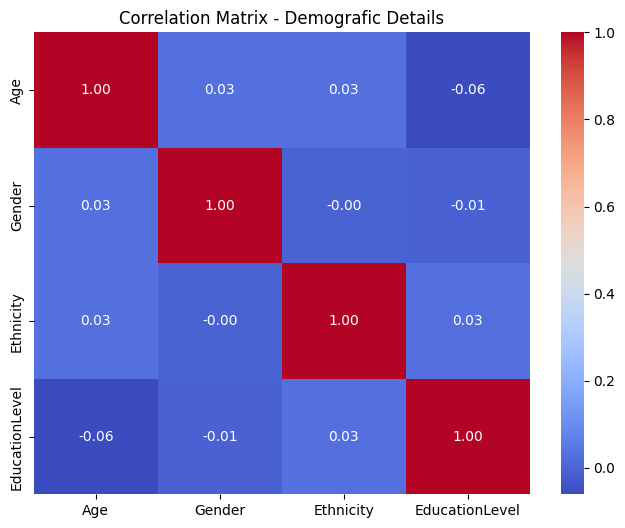


Chi-square test results (for categorical variables):
Chi-square test between Gender and Ethnicity: p-value = 0.6776
Chi-square test between Gender and EducationLevel: p-value = 0.8535
Chi-square test between Ethnicity and Gender: p-value = 0.6776
Chi-square test between Ethnicity and EducationLevel: p-value = 0.1150
Chi-square test between EducationLevel and Gender: p-value = 0.8535
Chi-square test between EducationLevel and Ethnicity: p-value = 0.1150


In [129]:
# Przykładowe dane (zastąp je swoimi danymi)
demographic_data = class_data["Demografic_Details"]

# Funkcja do kodowania zmiennych kategorycznych
def encode_categorical(data):
    le = LabelEncoder()
    encoded_data = data.copy()
    
    for col in encoded_data.columns:
        if encoded_data[col].dtype == 'object':  # Only encode categorical columns
            encoded_data[col] = le.fit_transform(encoded_data[col])
    
    return encoded_data

# 1. Przygotowanie danych (kodowanie zmiennych kategorycznych)
encoded_data = encode_categorical(demographic_data)

# 2. Obliczenie korelacji dla zmiennych numerycznych (Pearson)
correlation_matrix = encoded_data.corr(method='pearson')

# 3. Wizualizacja macierzy korelacji za pomocą heatmapy
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix - Demografic Details")
plt.show()

# 4. Test chi-kwadrat dla zmiennych kategorycznych (Gender, Ethnicity, EducationLevel)
def chi_square_test(data):
    print("\nChi-square test results (for categorical variables):")
    
    # Wykonaj test chi-kwadrat dla par zmiennych kategorycznych
    categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel']
    
    for col1 in categorical_cols:
        for col2 in categorical_cols:
            if col1 != col2:
                # Stwórz tabelę kontyngencji dla dwóch zmiennych kategorycznych
                contingency_table = pd.crosstab(data[col1], data[col2])
                # Test chi-kwadrat
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                print(f"Chi-square test between {col1} and {col2}: p-value = {p:.4f}")

# Przeprowadź test chi-kwadrat
chi_square_test(demographic_data)


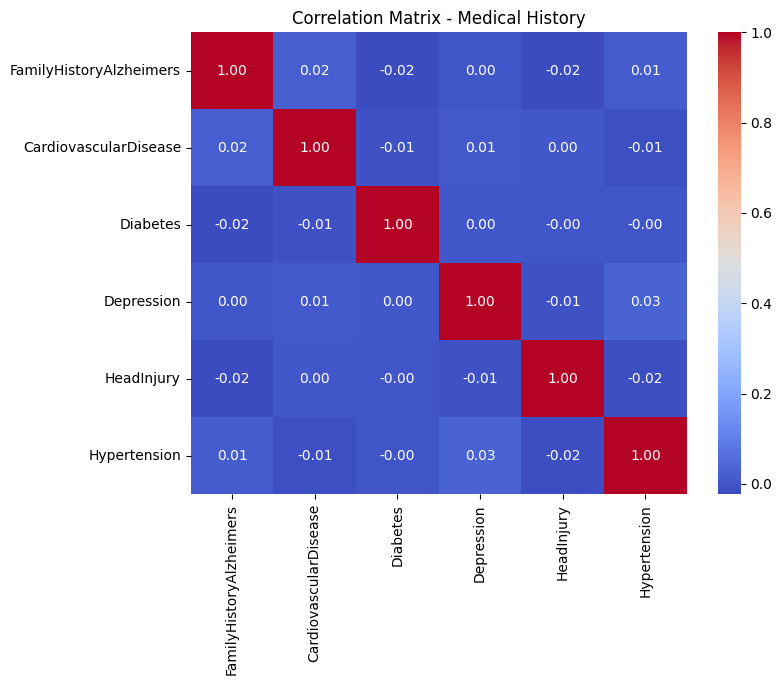


Chi-square test results (for categorical variables):
Chi-square test between FamilyHistoryAlzheimers and CardiovascularDisease: p-value = 0.3720
Chi-square test between FamilyHistoryAlzheimers and Diabetes: p-value = 0.3165
Chi-square test between FamilyHistoryAlzheimers and Depression: p-value = 1.0000
Chi-square test between FamilyHistoryAlzheimers and HeadInjury: p-value = 0.4216
Chi-square test between FamilyHistoryAlzheimers and Hypertension: p-value = 0.5967
Chi-square test between CardiovascularDisease and FamilyHistoryAlzheimers: p-value = 0.3720
Chi-square test between CardiovascularDisease and Diabetes: p-value = 0.7010
Chi-square test between CardiovascularDisease and Depression: p-value = 0.8388
Chi-square test between CardiovascularDisease and HeadInjury: p-value = 1.0000
Chi-square test between CardiovascularDisease and Hypertension: p-value = 0.6463
Chi-square test between Diabetes and FamilyHistoryAlzheimers: p-value = 0.3165
Chi-square test between Diabetes and Cardio

In [128]:
# Zakładamy, że masz dane w formacie DataFrame
medical_history_data = class_data["Medical_History"]

# Funkcja do kodowania zmiennych kategorycznych
def encode_categorical(data):
    le = LabelEncoder()
    encoded_data = data.copy()
    
    for col in encoded_data.columns:
        if encoded_data[col].dtype == 'object':  # Kodowanie tylko dla zmiennych kategorycznych
            encoded_data[col] = le.fit_transform(encoded_data[col])
    
    return encoded_data

# 1. Przygotowanie danych (kodowanie zmiennych kategorycznych)
encoded_data = encode_categorical(medical_history_data)

# 2. Obliczenie korelacji dla zmiennych numerycznych (Pearson)
correlation_matrix = encoded_data.corr(method='pearson')

# 3. Wizualizacja macierzy korelacji za pomocą heatmapy
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix - Medical History")
plt.show()

# 4. Test chi-kwadrat dla zmiennych kategorycznych (np. FamilyHistoryAlzheimers, CardiovascularDisease)
def chi_square_test(data):
    print("\nChi-square test results (for categorical variables):")
    
    # Wykonaj test chi-kwadrat dla par zmiennych kategorycznych
    categorical_cols = ['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']
    
    for col1 in categorical_cols:
        for col2 in categorical_cols:
            if col1 != col2:
                # Stwórz tabelę kontyngencji dla dwóch zmiennych kategorycznych
                contingency_table = pd.crosstab(data[col1], data[col2])
                # Test chi-kwadrat
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                print(f"Chi-square test between {col1} and {col2}: p-value = {p:.4f}")

# Przeprowadź test chi-kwadrat
chi_square_test(medical_history_data)


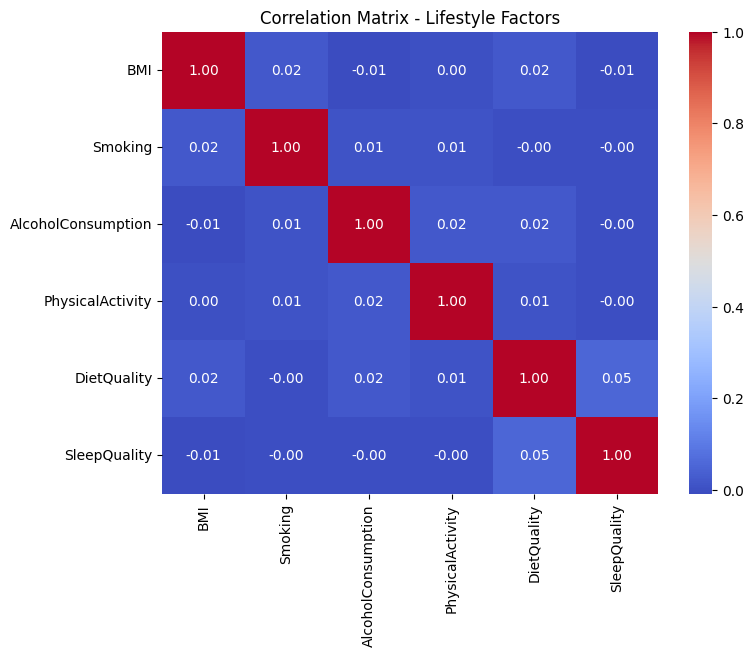


Chi-square test results (for categorical variables):
Chi-square test between Smoking and AlcoholConsumption: p-value = 0.7541
Chi-square test between Smoking and PhysicalActivity: p-value = 0.4899
Chi-square test between Smoking and DietQuality: p-value = 0.4899
Chi-square test between Smoking and SleepQuality: p-value = 0.4899
Chi-square test between AlcoholConsumption and Smoking: p-value = 0.7541
Chi-square test between AlcoholConsumption and PhysicalActivity: p-value = 0.4609
Chi-square test between AlcoholConsumption and DietQuality: p-value = 0.4609
Chi-square test between AlcoholConsumption and SleepQuality: p-value = 0.4609
Chi-square test between PhysicalActivity and Smoking: p-value = 0.4899
Chi-square test between PhysicalActivity and AlcoholConsumption: p-value = 0.4609
Chi-square test between PhysicalActivity and DietQuality: p-value = 0.2397
Chi-square test between PhysicalActivity and SleepQuality: p-value = 0.2397
Chi-square test between DietQuality and Smoking: p-valu

In [127]:

# Zakładamy, że masz dane w formacie DataFrame
lifestyle_data = class_data["Lifestyle_Factors"]

# Funkcja do kodowania zmiennych kategorycznych
def encode_categorical(data):
    le = LabelEncoder()
    encoded_data = data.copy()
    
    for col in encoded_data.columns:
        if encoded_data[col].dtype == 'object':  # Kodowanie tylko dla zmiennych kategorycznych
            encoded_data[col] = le.fit_transform(encoded_data[col])
    
    return encoded_data

# 1. Przygotowanie danych (kodowanie zmiennych kategorycznych)
encoded_data = encode_categorical(lifestyle_data)

# 2. Obliczenie korelacji dla zmiennych numerycznych (Pearson)
correlation_matrix = encoded_data.corr(method='pearson')

# 3. Wizualizacja macierzy korelacji za pomocą heatmapy
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix - Lifestyle Factors")
plt.show()

# 4. Test chi-kwadrat dla zmiennych kategorycznych (np. Smoking, AlcoholConsumption)
def chi_square_test(data):
    print("\nChi-square test results (for categorical variables):")
    
    # Wykonaj test chi-kwadrat dla par zmiennych kategorycznych
    categorical_cols = ['Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']
    
    for col1 in categorical_cols:
        for col2 in categorical_cols:
            if col1 != col2:
                # Stwórz tabelę kontyngencji dla dwóch zmiennych kategorycznych
                contingency_table = pd.crosstab(data[col1], data[col2])
                # Test chi-kwadrat
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                print(f"Chi-square test between {col1} and {col2}: p-value = {p:.4f}")

# Przeprowadź test chi-kwadrat
chi_square_test(lifestyle_data)
